In [99]:
import xarray as xr
import numpy as np
from affine import Affine
from matplotlib import pyplot as plt
import pandas as pd

In [93]:
dpm = {'noleap': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '365_day': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'standard': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'proleptic_gregorian': [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       'all_leap': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '366_day': [0, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31],
       '360_day': [0, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]}

def leap_year(year, calendar='standard'):
    """Determine if year is a leap year"""
    leap = False
    if ((calendar in ['standard', 'gregorian',
        'proleptic_gregorian', 'julian']) and
        (year % 4 == 0)):
        leap = True
        if ((calendar == 'proleptic_gregorian') and
            (year % 100 == 0) and
            (year % 400 != 0)):
            leap = False
        elif ((calendar in ['standard', 'gregorian']) and
                 (year % 100 == 0) and (year % 400 != 0) and
                 (year < 1583)):
            leap = False
    return leap

def get_dpm(time, calendar='standard'):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    month_length = np.zeros(len(time), dtype=np.int)

    cal_days = dpm[calendar]

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal_days[month]
        if leap_year(year, calendar=calendar) and month == 2:
            month_length[i] += 1
    return month_length

In [60]:
da = xr.open_rasterio('../../data_general/MOD13Q1/MOD13Q1_NDVI_1km_SEAUS_monmean_2000_2019-0000000000-0000000000.tif')
da.shape

(239, 1361, 1536)

In [61]:
da = da.rename({"x":"lon","y":"lat","band":"time"})

In [62]:
da

<xarray.DataArray (time: 239, lat: 1361, lon: 1536)>
[499628544 values with dtype=float64]
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 ... 232 233 234 235 236 237 238 239
  * lat      (lat) float64 -28.0 -28.0 -28.01 -28.02 ... -40.2 -40.2 -40.21
  * lon      (lon) float64 140.0 140.0 140.0 140.0 ... 153.8 153.8 153.8 153.8
Attributes:
    transform:      (0.008983152841195215, 0.0, 139.99345387718623, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.008983152841195215, 0.008983152841195215)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5'...
    AREA_OR_POINT:  Area

In [63]:
junk = da[1,:,:]

In [66]:
vec_dates = pd.date_range(start='2000-02-01',end="2019-12-01",periods=239,closed=None)
vec_dates

DatetimeIndex([          '2000-02-01 00:00:00',
               '2000-03-02 10:23:11.596638655',
               '2000-04-01 20:46:23.193277311',
               '2000-05-02 07:09:34.789915966',
               '2000-06-01 17:32:46.386554622',
               '2000-07-02 03:55:57.983193278',
               '2000-08-01 14:19:09.579831932',
               '2000-09-01 00:42:21.176470588',
               '2000-10-01 11:05:32.773109244',
               '2000-10-31 21:28:44.369747900',
               ...
               '2019-03-02 02:31:15.630252160',
               '2019-04-01 12:54:27.226890752',
               '2019-05-01 23:17:38.823529472',
               '2019-06-01 09:40:50.420168064',
               '2019-07-01 20:04:02.016806784',
               '2019-08-01 06:27:13.613445376',
               '2019-08-31 16:50:25.210084096',
               '2019-10-01 03:13:36.806722688',
               '2019-10-31 13:36:48.403361408',
                         '2019-12-01 00:00:00'],
              dtype=

In [75]:
# da.set_index(x=['band', 'wavenumber'])
da.coords["time"] = vec_dates

In [76]:
da.coords["time"]

<xarray.DataArray 'time' (time: 239)>
array(['2000-02-01T00:00:00.000000000', '2000-03-02T10:23:11.596638655',
       '2000-04-01T20:46:23.193277311', ..., '2019-10-01T03:13:36.806722688',
       '2019-10-31T13:36:48.403361408', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-02-01 ... 2019-12-01

In [81]:
da

<xarray.DataArray (time: 239, lat: 1361, lon: 1536)>
array([[[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan, 0.1174, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[   nan,    nan, ...,    nan,    nan],
        [0.0884,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2000-02-01 ... 2019-12-01
  * lat      (lat) float64 -28.0 -28.0 -28.01 -28.02 ... -40.2 -40.2 -40.21
  * lon      (lon) float64 140.0 140.0 140.0 140.0 ... 153.8 153.8 153.8 153.8
Attributes:
    transform:      (0.008983152841195215, 0.0, 139.99345387718623, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.008983152841195215, 0.008983152841195215)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5'...
    AREA_OR_POINT:  Area

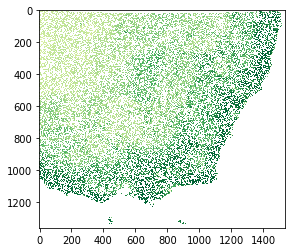

In [92]:
# RESHAPE THE NDVI
# time, lon, lat
plt.imshow(da[100,:,:],cmap='YlGn')

In [100]:
# Make a DataArray with the number of days in each month, size = len(time)
month_length = xr.DataArray(get_dpm(ds.time.to_index(), calendar='noleap'),
                            coords=[ds.time], name='month_length')

# Calculate the weights by grouping by 'time.season'.
# Conversion to float type ('astype(float)') only necessary for Python 2.x
weights = month_length.groupby('time.season') / month_length.astype(float).groupby('time.season').sum()

# Test that the sum of the weights for each season is 1.0
np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

# Calculate the weighted average
ds_weighted = (ds * weights).groupby('time.season').sum(dim='time')

Text(0.5, 1.02, 'Seasonal NDVI')

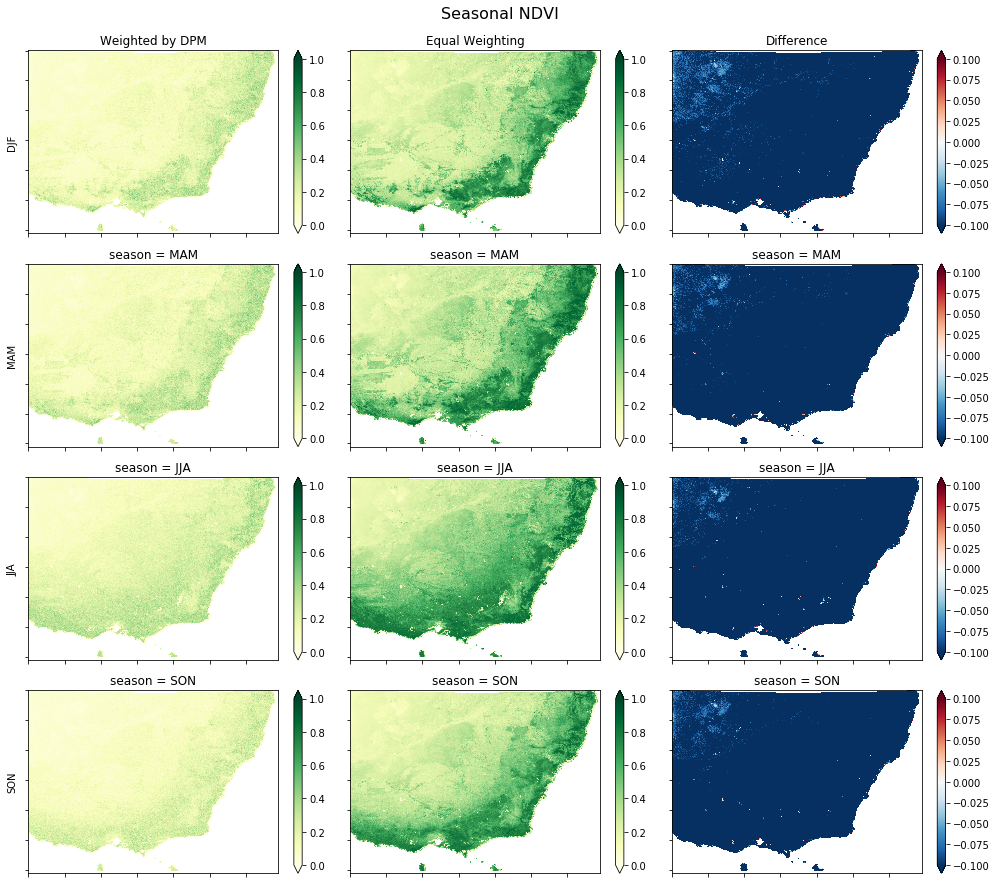

In [107]:
# Quick plot to show the results
notnull = pd.notnull(ds_unweighted[0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))
for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    ds_weighted.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0], vmin=-1, vmax=1, cmap='YlGn',
        add_colorbar=True, extend='both')

    ds_unweighted.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1], vmin=-1, vmax=1, cmap='Spectral_r',
        add_colorbar=True, extend='both')

    ds_diff.sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2], vmin=-0.1, vmax=.1, cmap='RdBu_r',
        add_colorbar=True, extend='both')

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')

axes[0, 0].set_title('Weighted by DPM')
axes[0, 1].set_title('Equal Weighting')
axes[0, 2].set_title('Difference')

plt.tight_layout()

fig.suptitle('Seasonal NDVI', fontsize=16, y=1.02)

In [138]:
year_season_idx = pd.MultiIndex.from_arrays([da['time.year'], da['time.season']])
da

<xarray.DataArray (time: 239, lat: 1361, lon: 1536)>
array([[[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan, 0.1174, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[   nan,    nan, ...,    nan,    nan],
        [0.0884,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]])
Coordinates:
  * time        (time) datetime64[ns] 2000-02-01 ... 2019-12-01
  * lat         (lat) float64 -28.0 -28.0 -28.01 -28.02 ... -40.2 -40.2 -40.21
  * lon         (lon) float64 140.0 140.0 140.0 140.0 ... 153.8 153.8 153.8
    year_month  (time) object (2000, 2) (2000, 3) ... (2019, 10) (2019, 12)
Attributes:
    transform:      (0.008983152841195215, 0.0, 139.99345387718623, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.008983152841195215, 0.008983152841195215)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5'...
    AREA_OR_POINT:  Area

In [143]:
da
#da = da.unstack("time.year_month")


<xarray.DataArray (time: 239, lat: 1361, lon: 1536)>
array([[[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan, 0.1174, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       ...,

       [[   nan,    nan, ...,    nan,    nan],
        [0.0884,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]],

       [[   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan],
        ...,
        [   nan,    nan, ...,    nan,    nan],
        [   nan,    nan, ...,    nan,    nan]]])
Coordinates:
  * time        (time) datetime64[ns] 2000-02-01 ... 2019-12-01
  * lat         (lat) float64 -28.0 -28.0 -28.01 -28.02 ... -40.2 -40.2 -40.21
  * lon         (lon) float64 140.0 140.0 140.0 140.0 ... 153.8 153.8 153.8
    year_month  (time) object (2000, 2) (2000, 3) ... (2019, 10) (2019, 12)
Attributes:
    transform:      (0.008983152841195215, 0.0, 139.99345387718623, 0.0, -0.0...
    crs:            +init=epsg:4326
    res:            (0.008983152841195215, 0.008983152841195215)
    is_tiled:       1
    nodatavals:     (nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n...
    scales:         (1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
    offsets:        (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
    descriptions:   ('NDVI', 'NDVI_1', 'NDVI_2', 'NDVI_3', 'NDVI_4', 'NDVI_5'...
    AREA_OR_POINT:  Area

In [134]:
da.coords['year_season'] = ('time', year_season_idx)


In [135]:
da_season = da.groupby('year_season').sum()

KeyError: 'year_season'

In [121]:
da_monthly

<xarray.DataArray (year_month: 202, lat: 1361, lon: 1536)>
array([[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.1648, ..., 0.    , 0.    , 0.    ],
        [0.1224, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.1174, 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.1236, ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.12  , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.1414, 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       ...,

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.0966, 0.1   , ..., 0.    , 0.    , 0.    ],
        [0.0952, 0.098 , 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.1808, 0.    , 0.204 , ..., 0.    , 0.    , 0.    ],
        [0.0926, 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.0976, ..., 0.    , 0.    , 0.    ],
        [0.095 , 0.0972, 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]]])
Coordinates:
  * lat                 (lat) float64 -28.0 -28.0 -28.01 ... -40.2 -40.2 -40.21
  * lon                 (lon) float64 140.0 140.0 140.0 ... 153.8 153.8 153.8
  * year_month          (year_month) MultiIndex
  - year_month_level_0  (year_month) int64 2000 2000 2000 ... 2019 2019 2019
  - year_month_level_1  (year_month) int64 2 3 4 5 6 7 8 9 ... 3 4 5 6 7 8 10 12

In [112]:
ds_yr = ds.groupby('time.year').mean(dim='time')

/home/sami/anaconda3/envs/sci/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [119]:
stacked = ds.stack(year_season=['year'])

KeyError: 'year'

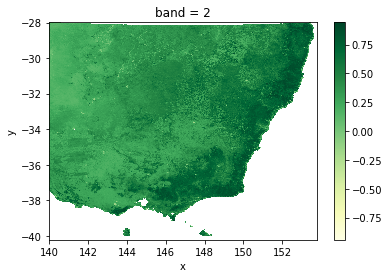

In [15]:
junk.plot(cmap='YlGn')

In [ ]:

transform = Affine.from_gdal(*da.attrs['transform'])
nx, ny = da.sizes['x'], da.sizes['y']
x, y = np.meshgrid(np.arange(nx)+0.5, np.arange(ny)+0.5) * transform